In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def calc(x):
    return 3*x + 2

In [40]:
x = torch.tensor([1.], requires_grad=True)
y = calc(x)
y.backward()


In [41]:
print(y.grad_fn)
print(x.grad)

tensor([3.])


In [42]:
def calc2(x, w, b):
    return w*x + b

In [43]:
w = torch.tensor([3.], requires_grad=True)
b = torch.tensor([5.], requires_grad=True)
x = torch.tensor([7.], requires_grad=True)
y2 = calc2(x, w, b)
y2.backward()



In [46]:
print(w.grad)
print(x.grad)
print(b.grad)
print(w.is_leaf)
print(y.is_leaf)
print(w.grad.zero_())

tensor([0.])
tensor([3.])
tensor([1.])
True
False
tensor([0.])


## 自動微分を用いた線形回帰
- 参考: https://rightcode.co.jp/blog/information-technology/pytorch-automatic-differential-linear-regression

In [62]:
# 教師データ作成
N = 200
x = np.random.rand(N)*30-15
y = 2*x + np.random.randn(N)*5
 
# float32型にしておく
x = x.astype(np.float32)
y = y.astype(np.float32)

In [63]:
# 線形モデルの定義
def model(x, w, b):
    return w*x + b

# 損失関数の定義
def mse(p, y):
    return ((p-y)**2).mean()

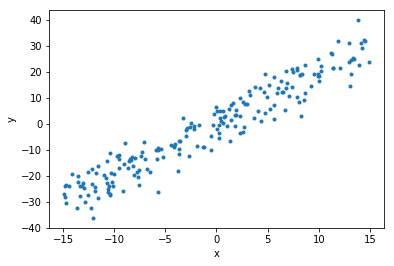

In [64]:
# データを描画
plt.scatter(x, y, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [65]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)
 
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

lr = 1.0e-4

In [66]:
losses = []
for epoch in range(3000):
    # 線形モデルによる値の予測
    p = model(x, w, b)
    
    # 損失値と自動微分
    loss = mse(p, y)
    loss.backward()
    
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    
    # グラディエントを使って変数`w`と`b`の値を更新する。
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()
 
    # グラフ描画用
    losses.append(loss.item())

In [69]:
print(w, b, loss)

tensor(1.9515, requires_grad=True) tensor(-0.0100, requires_grad=True) tensor(24.3713, grad_fn=<MeanBackward0>)


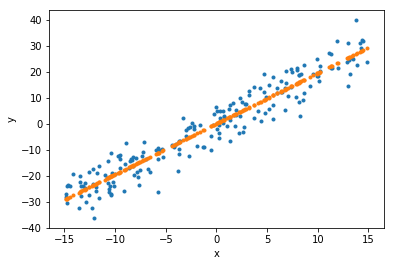

In [70]:
def draw_linear_regression(x, y, p):
    # PyTorchのTensorからNumpyに変換
    x = x.numpy()
    y = y.numpy()
    p = p.detach().numpy()
    
    plt.scatter(x, y, marker='.')
    plt.scatter(x, p, marker='.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
draw_linear_regression(x, y, p)

In [75]:
# p.numpy()
p.detach().numpy()

array([-27.630611  ,  12.327526  ,   0.8932026 , -20.494904  ,
         8.4705515 ,  14.325544  ,   3.7475314 , -22.545256  ,
        11.614646  , -25.141386  ,   0.1200266 ,   2.6759028 ,
         2.0911174 ,  11.635506  ,   4.5264673 ,  -3.250613  ,
        19.605734  , -28.19927   , -20.911148  ,  -8.204572  ,
        -7.8615174 ,  13.813486  , -11.147876  , -15.588211  ,
       -11.217862  ,  14.379971  , -16.00513   , -15.059068  ,
        22.13193   ,   0.4505977 , -19.563408  ,  15.798394  ,
        19.636303  ,  21.746117  ,  18.564983  ,  -5.3252006 ,
        15.974223  , -23.141863  , -13.592322  ,  -2.3305163 ,
         4.405485  ,  -7.2222624 ,   6.1836386 , -20.179667  ,
       -28.86718   ,  10.933467  ,   3.6136174 ,  -3.692729  ,
       -18.863844  ,  -5.5628524 ,   0.11214086,  -7.1348157 ,
       -22.543327  ,  10.945219  , -25.648397  ,   0.5499103 ,
         2.5719953 , -19.764158  ,  -6.446794  ,  -0.4751637 ,
       -15.813509  ,  19.860878  ,  16.024063  ,  25.39